<a href="https://colab.research.google.com/github/nuyhc/RhythmStudy/blob/main/1.%20PyTorch/Part_1_Basic_ML_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab-01-1 Tensor Manipulation 1

## 학습목표
텐서 조작(Tensor Manipulation)에 대해 알아본다.

## 핵심키워드
텐서(Tensor)
넘파이(NumPy)
텐서 조작(Tensor Manipulation)
브로드캐스팅(Broadcasting)

## Import

In [1]:
import numpy as np
import torch

## Numpy Review

### 1D Arrary with NumPy

In [2]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [3]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  1
Shape of t:  (7,)


In [4]:
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])  # Element
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1])    # Slicing
print('t[:2] t[3:]     = ', t[:2], t[3:])       # Slicing

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]
t[:2] t[3:]     =  [0. 1.] [3. 4. 5. 6.]


### 2D Arrary with NumPy

In [5]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


In [6]:
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

Rank  of t:  2
Shape of t:  (4, 3)


## PyTorch Review

### 1D Arrary with PyTorch

In [7]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [8]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t.size()) # shape
print(t[0], t[1], t[-1])  # Element
print(t[2:5], t[4:-1])    # Slicing
print(t[:2], t[3:])       # Slicing

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


### 2D Arrary with PyTorch

In [9]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                       ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [10]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t[:, 1])
print(t[:, 1].size())
print(t[:, :-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


### Broadcasing

$|m_1| = (1, 2)$  
$|m_2| = |m_1|$

In [11]:
# Same shape
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


$|m_1| = (1, 2)$  
$|m_2| = (1, ) \to (1, 2)$

In [12]:
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3])  # 3 -> [[3, 3]]
print(m1 + m2)  # [[1, 2]] + [[3, 3]]

tensor([[4., 5.]])


$|m_1| = (1, 2)\to (2, 2)$  
$|m_2| = (2, 1)\to (2, 2)$  
$|m_1| + |m_2| = \begin{bmatrix}1&2\\1&2\\  \end{bmatrix} + \begin{bmatrix}3&3\\4&4\\  \end{bmatrix}$

In [13]:
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


## Multiplication vs Matrix Multiplication

In [14]:
print()
print('-------------')
print('Mul vs Matmul')
print('-------------')
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape)  # 2 x 2
print('Shape of Matrix 2: ', m2.shape)  # 2 x 1
print(m1.matmul(m2))
print()
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape)  # 2 x 2
print('Shape of Matrix 2: ', m2.shape)  # 2 x 1 => 2 x 2
print(m1 * m2)  # 2 x 2
print(m1.mul(m2))


-------------
Mul vs Matmul
-------------
Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


## Mean

In [15]:
t = torch.FloatTensor([1, 2])
print(t.mean())

tensor(1.5000)


In [16]:
# Can't use mean() on integers
t = torch.LongTensor([1, 2])
try:
    print(t.mean())
except Exception as exc:
    print(exc)

mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long


You can also use `t.mean` for higher rank tensors to get mean of all elements, or mean by particular dimension.

In [17]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


```python
print(t.mean(dim=0))
```
$\begin{bmatrix}1&2\\3&4 \end{bmatrix} = \begin{bmatrix}?&? \end{bmatrix} \to \begin{bmatrix}2&3 \end{bmatrix}$   

```python
print(t.mean(dim=1))
```
$\begin{bmatrix}1&2\\3&4 \end{bmatrix} = \begin{bmatrix}?\\? \end{bmatrix} \to \begin{bmatrix}1.5\\1.5 \end{bmatrix}$ 

In [18]:
print(t.mean())
print(t.mean(dim=0))
print(t.mean(dim=1))
print(t.mean(dim=-1))

tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


## Sum

In [19]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [20]:
print(t.sum())
print(t.sum(dim=0))
print(t.sum(dim=1))
print(t.sum(dim=-1))

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


## Max and Argmax

In [21]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


The `max` operator returns one value if it is called without an argument.

In [22]:
print(t.max())  # Returns one value: max

tensor(4.)


The `max` operator return 2 values when called with dimension specified. The first value is the maximum value, and the second value is the argmax: the index of the element with maximum value.

In [23]:
print(t.max(dim=0))  # Returns two values: max and argmax
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [24]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


# Lab-01-2 Tensor Manipulation 2

## 학습목표

지난 시간에 이어서 텐서 조작(Tensor Manipulation)에 대해 계속 알아본다.

## 핵심키워드

텐서(Tensor)  
넘파이(NumPy)  
텐서 조작(Tensor Manipulation)  
View, Squeeze, Unsqueeze, Type Casting, Concatenate, Stacking, In-place Operation

## View (Reshape)

$|ft| = (2, 2, 3) \to (2x2, 3) \to (2x2, 1, 3)$

In [25]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [26]:
print(ft.view([-1, 3]))
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [27]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


## Squeeze

$|ft| = (3, 1) \to (3, )$

In [28]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [29]:
print(ft.squeeze())  # ft.squeeze(dim=1)
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


## Unsqueeze

In [30]:
ft = torch.Tensor([0, 1, 2])
print(ft.shape)

torch.Size([3])


In [31]:
print(ft.unsqueeze(0))  # 원하는 dimension에 차원을 넣어라
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [32]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [33]:
print(ft.unsqueeze(1))  # 원하는 dimension에 차원을 넣어라
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [34]:
print(ft.unsqueeze(-1))
print(ft.unsqueeze(-1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


## Type Casting

In [35]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [36]:
print(lt.float())

tensor([1., 2., 3., 4.])


In [37]:
bt = torch.ByteTensor([True, False, False, True])  # 마스킹 기법으로 활용할 수 있음
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


In [38]:
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


## Concatenate

$|x| = |y| = (2, 2)$

In [39]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

In [40]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


## Stacking

In [41]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [42]:
print(torch.stack([x, y, z]))
print(torch.stack([x, y, z], dim=1))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [43]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


## Ones and Zeros

In [44]:
x = torch.FloatTensor([[0, 1, 2], [3, 4, 5]])
print(x)

tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [45]:
print(torch.ones_like(x))
print(torch.zeros_like(x))  # device

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## In-place Operation

In [46]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [47]:
print(x.mul(2.))
print(x)
print(x.mul_(2.))
print(x)

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])


# Lab-02 Linear regression

## 학습목표

선형회귀(Linear Regression)에 대해 알아본다.

## 핵심키워드

선형회귀(Linear Regression)  
평균 제곱 오차(Mean Squared Error)  
경사하강법(Gradient descent)  

## Data definition
* 데이터는 torch.tensor
* 입력 따로, 출력 따로
    * 입력: x_train
    * 출력: y_train
    * 입출력은 x, y 로 구분

In [48]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

## Hypothesis
$y = Wx + b$
* Weight 와 Bias 0으로 초기화
    * 항상 출력 0을 예측
* requires_grad=True
    * 학습할 것이라고 명시

In [49]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

## Compute loss

### Mean Squared Error (MSE)
$cost(W,b) = \frac{1}{m}\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^2$
* torch.mean 으로 평균 계산
* 한 줄인데 읽기 편한 코드

In [50]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient descent
* torch.optim 라이브러리 사용
    * [W, b] 는 학습할 tensor들
    * lr=0.01 은 learning rate

* 항상 붙어다니는 3줄
    * zero_grad() 로 gradient 초기화
    * backward() 로 gradient 계산
    * step() 으로 개선

In [51]:
import torch.optim as optim

optimizer = optim.SGD([W, b], lr=0.01)

optimizer.zero_grad()
cost.backward()
optimizer.step()

## Full traning code

In [52]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
    hypothesis = x_train * W * b
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

# Lab-03 Deeper Look at GD

## 학습목표

경사하강법(Gradient descent)에 대해 더 자세히 알아본다.

## 핵심키워드

가설 함수(Hypothesis Function)  
평균 제곱 오차(Mean Squared Error)  
경사하강법(Gradient descent)

## Simpler Hypothesis Function
$H(x) = Wx$
* W는 하나의 matrix이고 이것이 x라는 imput 벡터에 곱해진 후 b라는 Bias 벡터에 더해져서 예측값 H(x)를 계산합니다.

In [53]:
W = torch.zeros(1, requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W

In [54]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

## What is the best model?
* $H(x) = x$ 가 정확한 모델
* $W = 1$ 이 가장 좋은 숫자

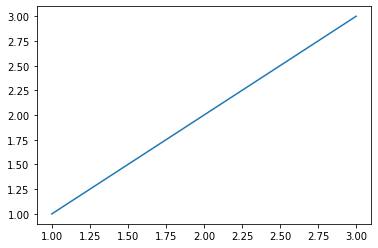

In [55]:
import matplotlib.pyplot as plt

plt.plot(x_train, y_train)
plt.show()

## Cost function: Intuition
* $W = 1$ 일 때 $cost = 0$
* 1에서 멀어질수록 높아진다.


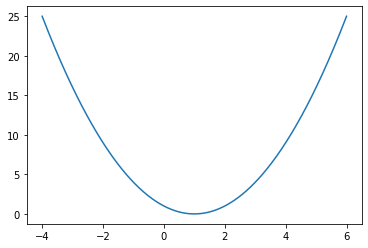

In [56]:
x = torch.linspace(-5, 5, 1000)
y = x * x

plt.plot(x+1, y)
plt.show()

### Mean Squared Error (MSE)
$cost(W,b) = \frac{1}{m}\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^2$

In [57]:
cost = torch.mean((hypothesis - y_train) ** 2)

## Gradient Descent: Intuition
우리가 원하는 것은 cost function을 최소화하는 일이다.  
cost function을 최소화하려면
* 기울기가 음수일 때는 W가 더 커져야 하고, 기울기가 양수일 때는 W가 더 작아져야 함
* 기울기가 가파를수록 cost가 큰 것이니 W를 크게 바꾸고, 평평할수록 cost가 0에 가까운 것이니 W를 조금 바꿔야 함 
$$\frac {\partial cost}{∂ W} = \nabla W$$
* 곡선을 내려가자
* 기울기가 클수록 더 멀리
* **"Gradient"**를 계산하자

### Gradient Descent: The Math
Gradient를 이용해서 Cost를 줄인다는 뜻  
$cost(W,b) = \frac{1}{m}\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^2$  
$\nabla W = \frac {\partial cost}{\partial W} = \frac {2}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$ 
$$W:= W - \alpha \nabla W$$
* *$\alpha$: Learing rate*
* *$W$: Gradient*

### Gradient Descent: Code
$\nabla W = \frac {\partial cost}{\partial W} = \frac {2}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$   
$W:= W - \alpha \nabla W$

In [63]:
gradient = 2 * torch.mean((W * x_train - y_train) * x_train)
lr = 0.1
W = W - lr * gradient
W

tensor([0.9956], grad_fn=<SubBackward0>)

### Gradient Descent with torch.optim
* torch.optim 으로도 gradient descent를 할 수 있음
    * 시작할 때 optimizer 정의
    * optimizer.zero_grad()로 gradient를 0으로 초기화
    * cost.backward()로 gradient 계산
    * optimizer.step()으로 gradient descent

In [ ]:
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)  # W에 gradient를 저장

# cost로 H(x) 개선
optimizer.zero_grad()  # 학습 가능한 모든 gradient 초기화
cost.backward()  # cost function을 미분해서 각 변수들의 gradient로 채움
optimizer.step()  # 저장된 gradient 값으로 gradient descent를 시행

## Full Code with torch.optim
* 학습하면서 점점:
    * 1에 수렴하는 W
    * 줄어드는 cost

In [79]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746667
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


## Full Code
* Epoch: 데이터로 학습한 횟수
* 학습하면서 점점:
    * 1에 수렴하는 W
    * 줄어드는 cost

In [76]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# Learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W

    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))
    
    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000
